In [43]:
!pip install transformers datasets sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
from datasets import load_dataset 
# possible language pairs: https://opus.nlpl.eu/KDE4.php
data = load_dataset('kde4', lang1 = 'en', lang2 = 'fr')
data

  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 210173
    })
})

In [45]:
# set to 1_000
small = data['train'].shuffle(seed = 42) # .select(range(1_000))

In [46]:
split = small.train_test_split(seed = 42) 

In [47]:
split['train'][0]

{'id': '189716', 'translation': {'en': 'DeskJet 340', 'fr': 'DeskJet 340'}}

In [48]:
from transformers import AutoTokenizer 

checkpoint = 'Helsinki-NLP/opus-mt-en-fr' 
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [49]:
en = split['train'][5]['translation']['en']
fr = split['train'][5]['translation']['fr']
en, fr

('%1 attribute of %2 element must either contain %3 or the other values.',
 "L'attribut %1 de l'élément %2 doit contenir soit %3 soit les autres valeurs.")

In [50]:
inputs = tokenizer(en) 
inputs

{'input_ids': [301, 548, 31891, 7, 301, 331, 5709, 280, 1828, 5019, 301, 602, 57, 4, 126, 2619, 3, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [51]:
# context manager, target tokenizer will detect french language
with tokenizer.as_target_tokenizer():
  targets = tokenizer(fr) 

targets

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3596: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


{'input_ids': [87, 6, 36543, 301, 548, 5, 14, 6, 12039, 301, 331, 283, 13403, 345, 301, 602, 345, 16, 214, 2218, 3, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [52]:
# tokenizer auto-detects the french language
tokenizer.convert_ids_to_tokens(targets['input_ids'])

['▁L',
 "'",
 'attribut',
 '▁%',
 '1',
 '▁de',
 '▁l',
 "'",
 'élément',
 '▁%',
 '2',
 '▁doit',
 '▁contenir',
 '▁soit',
 '▁%',
 '3',
 '▁soit',
 '▁les',
 '▁autres',
 '▁valeurs',
 '.',
 '</s>']

In [53]:
# wrong language, here no target language is passed and the tokenizer uses english by default
bad_targets = tokenizer(fr)
tokenizer.convert_ids_to_tokens(bad_targets['input_ids'])

['▁L',
 "'",
 'at',
 'tri',
 'but',
 '▁%',
 '1',
 '▁de',
 '▁l',
 "'",
 'élé',
 'ment',
 '▁%',
 '2',
 '▁do',
 'it',
 '▁con',
 'ten',
 'ir',
 '▁so',
 'it',
 '▁%',
 '3',
 '▁so',
 'it',
 '▁les',
 '▁au',
 'tres',
 '▁val',
 'eurs',
 '.',
 '</s>']

(array([1.42313e+05, 8.63800e+03, 3.64700e+03, 1.60800e+03, 7.40000e+02,
        3.28000e+02, 1.56000e+02, 6.30000e+01, 5.10000e+01, 2.40000e+01,
        2.00000e+01, 9.00000e+00, 1.20000e+01, 3.00000e+00, 2.00000e+00,
        4.00000e+00, 1.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.00000e+00, 1.06880e+02, 2.12760e+02, 3.18640e+02, 4.24520e+02,
        5.30400e+02, 6.36280e+02, 7.42160e+02, 8.48040e+02, 9.53920e+02,
        1.05980e+03, 1.16568e+03, 1.27156e+03, 1.37744e+03, 1.48332e+03,
        1.58920e+03, 1.69508e+03, 1.80096e+03, 1.

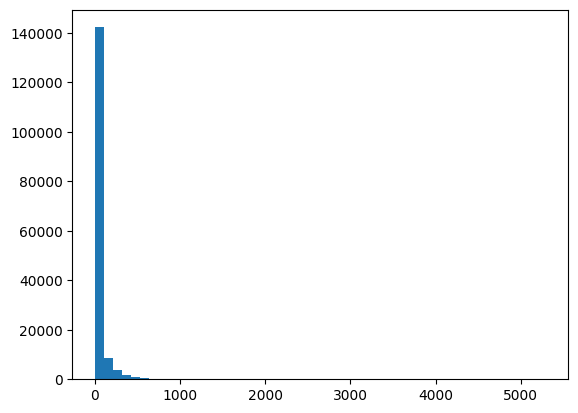

In [54]:
import matplotlib.pyplot as plt 

train = split['train']['translation']
input_lens = [len(tr['en']) for tr in train]

plt.hist(input_lens, bins = 50) 

(array([1.38252e+05, 1.05210e+04, 4.35900e+03, 2.10500e+03, 1.16500e+03,
        5.51000e+02, 2.88000e+02, 1.50000e+02, 7.90000e+01, 5.00000e+01,
        3.40000e+01, 2.50000e+01, 1.10000e+01, 6.00000e+00, 8.00000e+00,
        4.00000e+00, 4.00000e+00, 3.00000e+00, 0.00000e+00, 1.00000e+00,
        2.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([1.00000e+00, 1.07880e+02, 2.14760e+02, 3.21640e+02, 4.28520e+02,
        5.35400e+02, 6.42280e+02, 7.49160e+02, 8.56040e+02, 9.62920e+02,
        1.06980e+03, 1.17668e+03, 1.28356e+03, 1.39044e+03, 1.49732e+03,
        1.60420e+03, 1.71108e+03, 1.81796e+03, 1.

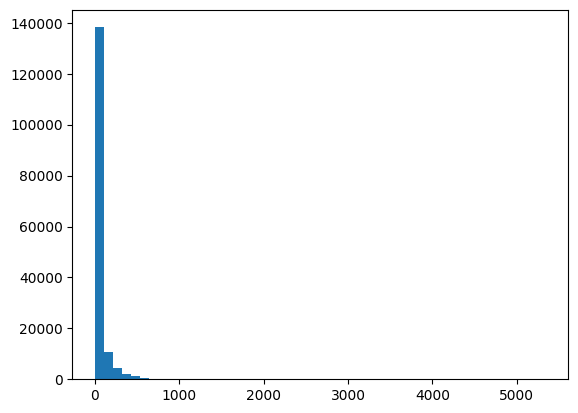

In [55]:
target_lens = [len(tr['fr']) for tr in train]
plt.hist(target_lens, bins = 50)

In [56]:
max_input_len = 128 
max_target_len = 128

def tokenizer_fn(batch): 
  inputs = [x['en'] for x in batch['translation']]
  targets = [x['fr'] for x in batch['translation']]

  tokenized_inputs = tokenizer(
      inputs, max_length = max_input_len, truncation = True
  )
  
  with tokenizer.as_target_tokenizer(): 
    tokenized_targets = tokenizer(
        targets, max_length = max_target_len, truncation = True
    )

  tokenized_inputs['labels'] = tokenized_targets['input_ids']
  return tokenized_inputs

In [57]:
tokenized_datasets = split.map(
    tokenizer_fn, 
    batched = True, 
    remove_columns = split['train'].column_names
)

Map:   0%|          | 0/157629 [00:00<?, ? examples/s]

Map:   0%|          | 0/52544 [00:00<?, ? examples/s]

In [58]:
from transformers import AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

In [59]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model = model) 

In [60]:
[tokenized_datasets['train'][i] for i in range(1, 3)]

[{'input_ids': [37483, 0], 'attention_mask': [1, 1], 'labels': [1545, 247, 0]},
 {'input_ids': [18666, 4004, 26, 526, 46235, 51, 0],
  'attention_mask': [1, 1, 1, 1, 1, 1, 1],
  'labels': [33355, 5, 8418, 27, 526, 323, 247, 16278, 0]}]

In [61]:
batch = data_collator([tokenized_datasets['train'][i] for i in range(1,3)])
batch.keys()

dict_keys(['input_ids', 'attention_mask', 'labels', 'decoder_input_ids'])

In [62]:
batch['labels']

tensor([[ 1545,   247,     0,  -100,  -100,  -100,  -100,  -100,  -100],
        [33355,     5,  8418,    27,   526,   323,   247, 16278,     0]])

In [63]:
# think of seq2seq RNNs - the decoder RNN must have some input
# its just like a language model where we predict the next word 
# from previous words? 
batch['decoder_input_ids']

tensor([[59513,  1545,   247,     0, 59513, 59513, 59513, 59513, 59513],
        [59513, 33355,     5,  8418,    27,   526,   323,   247, 16278]])

In [64]:
# the first token is a pad!
tokenizer.convert_ids_to_tokens(batch['decoder_input_ids'][0])

['<pad>', '▁Mon', 'o', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']

In [65]:
# the labels are one step ahead - just like a language model 
tokenizer.convert_ids_to_tokens(batch['labels'][0])

['▁Mon', 'o', '</s>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>']

In [66]:
split['train'][1]

{'id': '196862', 'translation': {'en': 'Mono', 'fr': 'Mono'}}

In [67]:
!pip install sacrebleu bert-score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
from datasets import load_metric

bleu_metric = load_metric('sacrebleu')
bert_metric = load_metric('bertscore')

In [69]:
# targets must be in a list - for bleu there can be multiple 
# acceptable reference translations
# score = 0, bleu doensn't work for short sentences
bleu_metric.compute(predictions=["I love cats"], references= [["I love cats"]])

{'score': 0.0,
 'counts': [3, 2, 1, 0],
 'totals': [3, 2, 1, 0],
 'precisions': [100.0, 100.0, 100.0, 0.0],
 'bp': 1.0,
 'sys_len': 3,
 'ref_len': 3}

In [70]:
s = "Marian is an efficient MNT framework written in pure C++"
bleu_metric.compute(predictions=[s], references = [[s]])
# longer sentence, 100% score
# n-grams => either they match, or not

{'score': 100.00000000000004,
 'counts': [12, 11, 10, 9],
 'totals': [12, 11, 10, 9],
 'precisions': [100.0, 100.0, 100.0, 100.0],
 'bp': 1.0,
 'sys_len': 12,
 'ref_len': 12}

In [71]:
# bert can compare words with similar meaning
bert_metric.compute(
    predictions = ["I love cats"],
    references = [["I like cats"]], 
    lang= 'en'
)

{'precision': [0.9803369045257568],
 'recall': [0.9803369045257568],
 'f1': [0.9803369045257568],
 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.28.1)'}

In [72]:
import numpy as np 

def compute_metrics(preds_and_labels): 
  # preds are not logits, but token ids 
  preds, labels = preds_and_labels 

  # convert predictions into words
  decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens = True) 

  # for any -100 label, replace with pad token id 
  labels = np.where(labels != -100, labels, tokenizer.pad_token_id) 

  # convert labels into words 
  decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens = True) 

  # get rid of extraneous whitespace
  # and also, put targets into lists
  decoded_preds = [pred.strip() for pred in decoded_preds]
  decoded_labels = [[label.strip()] for label in decoded_labels]

  bleu = bleu_metric.compute(
      predictions = decoded_preds, references = decoded_labels
  )
  bert_score = bert_metric.compute(
      predictions = decoded_preds, references = decoded_labels, lang = 'fr'
  )

  return {"bleu" : bleu["score"], "bert_score": np.mean(bert_score['f1'])}


In [73]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    "finetuned-model", 
    # time consuming
    evaluation_strategy = "no",
    save_strategy = "epoch", 

    learning_rate = 2e-5, 
    per_device_train_batch_size = 32, 
    per_device_eval_batch_size = 64, 
    weight_decay = 0.01, 
    save_total_limit = 3, 

    # generate prediction without knowing the true targets fed into decoder 
    predict_with_generate = True, 

    # 16 bit to store numbers, less precise weights 
    fp16 = True
)

In [74]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    model, 
    training_args, 
    train_dataset = tokenized_datasets['train'], 
    eval_dataset = tokenized_datasets['test'], 
    data_collator = data_collator, 
    tokenizer = tokenizer, 
    compute_metrics = compute_metrics 
)

In [75]:
# check metrics before starting 
trainer.evaluate(max_length = max_target_len) 

KeyboardInterrupt: ignored

In [76]:
# may run out of gpu memory (restart runtime) 
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,1.390800
1000,1.244600
1500,1.171500
2000,1.144000
2500,1.091500
3000,1.078100
3500,1.051500
4000,1.053000
4500,1.026300
5000,1.024000


Step,Training Loss
500,1.390800
1000,1.244600
1500,1.171500
2000,1.144000
2500,1.091500
3000,1.078100
3500,1.051500
4000,1.053000
4500,1.026300
5000,1.024000


TrainOutput(global_step=14778, training_loss=0.9569516488479365, metrics={'train_runtime': 2907.0073, 'train_samples_per_second': 162.671, 'train_steps_per_second': 5.084, 'total_flos': 9379144205991936.0, 'train_loss': 0.9569516488479365, 'epoch': 3.0})

In [2]:
# metrics again 
trainer.evaluate(max_length = max_target_len) 

NameError: ignored

In [ ]:
trainer.save_model('my_saved_model')

In [ ]:
from transformers import pipeline 
translator = pipeline("translation", model = 'my_saved_model', device = 0)

In [ ]:
translator("I hope this course has helped you on your data science journey!")